In [1]:
from google.colab import drive
import os
import tensorflow as tf
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = '/content/drive/MyDrive/dataset'

training_dir = os.path.join(data_dir, 'training')
validation_dir = os.path.join(data_dir, 'validation')
testing_dir = os.path.join(data_dir, 'testing')

In [3]:
dataset_path = '/content/drive/MyDrive/dataset/training/training_eye'  # Replace with the path to your dataset directory in Google Drive

# Get the list of image files in the dataset directory
image_files = os.listdir(dataset_path)

# Count the number of image files
num_images = len(image_files)

# Print the number of images
print(f"Number of images: {num_images}")

Number of images: 2278


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (150,150)
batch_size = 256

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.25,
    zoom_range=0.25,
    rotation_range = 45,
    horizontal_flip=True,
    vertical_flip=True
    )
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='binary',
    shuffle = True
    )

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='binary',
    shuffle = False
    )

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='binary',
    shuffle = False
    )

Found 4556 images belonging to 2 classes.
Found 567 images belonging to 2 classes.
Found 568 images belonging to 2 classes.


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer= optimizer,
              metrics=['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)

# Access the accuracy and validation accuracy from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']



Epoch 1/10
18/18 [==============================] - 891s 49s/step - loss: 0.4633 - accuracy: 0.8365 - val_loss: 0.0798 - val_accuracy: 0.9771
Epoch 2/10
18/18 [==============================] - 150s 8s/step - loss: 0.0458 - accuracy: 0.9798 - val_loss: 0.0118 - val_accuracy: 0.9965
Epoch 3/10
18/18 [==============================] - 144s 8s/step - loss: 0.0145 - accuracy: 0.9945 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 142s 8s/step - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.0121 - val_accuracy: 0.9965
Epoch 5/10
18/18 [==============================] - 142s 8s/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0028 - val_accuracy: 0.9982
Epoch 6/10
18/18 [==============================] - 149s 8s/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 144s 8s/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9982
Epoch 8/10
1

In [7]:
from matplotlib import pyplot as plt

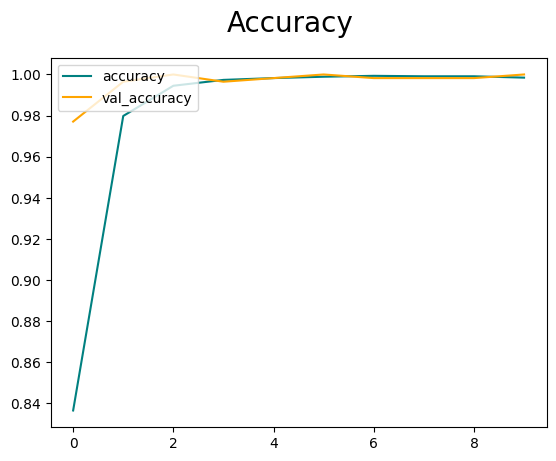

In [8]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

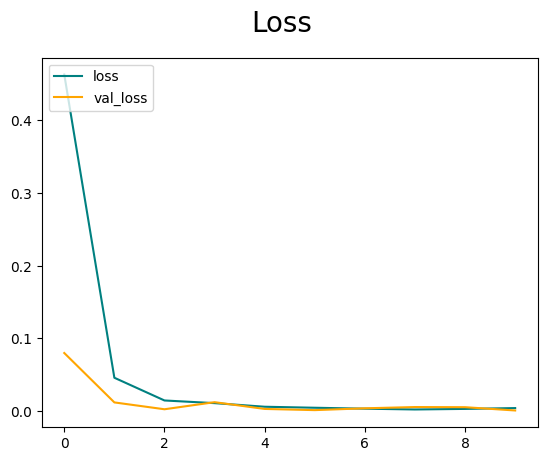

In [9]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_generator)
predicted_labels = predictions > 0.5 
true_labels = test_generator.classes
report = classification_report(true_labels, predicted_labels)
print(report)


3/3 [==============================] - 97s 47s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       284

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568



In [11]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


3/3 [==============================] - 5s 1s/step - loss: 0.0022 - accuracy: 0.9982
Test Loss: 0.0021962563041597605
Test Accuracy: 0.9982394576072693


In [12]:
model.save("/content/drive/MyDrive/model_directory/Eyes_Classification_Model.h5")
